In [28]:
import utils
import skimage
import skimage.morphology
import numpy as np
import pathlib
import matplotlib.pyplot as plt

In [29]:
def distance_transform(im: np.ndarray) -> np.ndarray:

    """
        A function that computes the distance to the closest boundary pixel.

        args:
            im: np.ndarray of shape (H, W) with boolean values (dtype=np.bool)
        return:
            (np.ndarray) of shape (H, W). dtype=np.int32
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    # You can also define other helper functions
    # plt.imshow(im, cmap="binary")
    # plt.show()
    assert im.dtype == bool
    structuring_element = np.array([
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ], dtype=bool)
    dist_im = np.zeros_like(im, int)
    im_shape=im.shape
    counter = 1
    is_true_pixel=True
    while is_true_pixel == True:
        is_true_pixel = False#bad way of doing it, but should work
        for row in range(im_shape[0]):
            for col in range(im_shape[1]):
                # print(f"row: {row}, col: {col}")
                if im[row, col]==True:
                    is_true_pixel = True 
                    # xy= [row, col]
                    # dist_im[xy[:]] += 1   
                    dist_im[row, col] += 1
        im =skimage.morphology.binary_erosion(im, structuring_element)
        
    
    result = dist_im.astype(np.int32)
    return result

In [30]:
###all of this was useless... next time i will read the task better before starting coding....
"""
def distance_transform1(im: np.ndarray) -> np.ndarray:
    plt.imshow(im, cmap="binary")
    plt.show()

        # A function that computes the distance to the closest boundary pixel.

        # args:
        #     im: np.ndarray of shape (H, W) with boolean values (dtype=np.bool)
        # return:
        #     (np.ndarray) of shape (H, W). dtype=np.int32

    ### START YOUR CODE HERE ### (You can change anything inside this block)
    # You can also define other helper functions
    assert im.dtype == bool
    # structuring_element = np.array([
    #     [1, 1, 1],
    #     [1, 1, 1],
    #     [1, 1, 1]
    # ], dtype=bool)
    
    
    im_shape=im.shape
    
    # print(f"image shape: {im_shape}")
    #create new object dist_im = np.zeroes_as(im)
    dist_im = np.zeros_like(im,int)
    # print(dist_im)
    #for each pixel in image:
    for row in range(im_shape[0]):
        # print(f"row: {row}")
        for col in range(im_shape[1]):
            print(f"row: {row}, col: {col}")
            
            if im[row, col]==True:
                # print(row, col)
                xy= [row, col]
                # print(im)
                dist = shortest_distance(im, dist_im,xy)
                dist_im[row, col] =dist
                # print(f"{xy} , {dist}")
        
        #if pixel is TRUE (1)
            #find shortest distance to a false pixel.
            #save shortest disance with same placement as pixel in dist_im
    
    # print(dist_im)
    
    result = dist_im.astype(np.int32)
    return result

def traverse_straight(im:np.ndarray, xy:list):
    #definig directions:
    top_left = [-1, -1]
    top_mid = [-1, 0]
    top_right = [-1, 1]
    mid_left = [0, -1]
    mid_right = [0, 1]
    bot_left = [1, -1]
    bot_mid = [1, 0]
    bot_right = [1, 1]
    
    min_dist = max(im.shape[0], im.shape[1])*2 #making sure we always have a min_dist bigger than anny actual min_dist
    


# def traverse_dir(im:np.ndarray, xy:list, dir:list, dist:int):
    
#     if(im[xy[:]]):#should be True unless we find an "edge" 
        
        
    
class Node:
    
    def __init__(self, xy:list, dist=0, completed = False, father = False, children =None):
        self.xy = xy
        self.dist = dist
        self.father = father
        self.children = children
        self.completed = completed
        
    def traverse(self):
        return self.children
    
    def reverse(self):
        return self.father
    
    def add_child(self):
        pa = self.father
        pa.children.append(self)
        
    def add_dist1(self, node):
        #
        # adds +1 to all children nodes and childrens children nodes
        #
        if len(self.children) >=1:
            self.value +=1
            for child in self.children:
                self.traverse(child)
            
    def completed(self, node):
        if(self.father != None):
            self.completed = True
            self.completed(self.father)
            
            
class linked_list:
    def __init__(self):
        self.head =None
        
    def insert(self, data):
        newNode = Node(data)
        if self.head:
            current = self.head
            
            
            
        

#----------------
def distance_transform1(im: np.ndarray) -> np.ndarray:
    assert im.dtype == bool
    im_shape=im.shape
    dist_im = np.zeros_like(im,int)
    for row in range(im_shape[0]):
        for col in range(im_shape[1]):
            if im[row, col]==True:
                xy= [row, col]
                # if()
                # print(im)
                dist = shortest_distance(im, dist_im,xy)
                dist_im[row, col] =dist
                # print(f"{xy} , {dist}")
        
        #if pixel is TRUE (1)
            #find shortest distance to a false pixel.
            #save shortest disance with same placement as pixel in dist_im
    
    # print(dist_im)
    
    result = dist_im.astype(np.int32)
    return result
    





#define new function: find shortest distance(im, structuring-element?):

def shortest_distance(im:np.ndarray, dist_im:np.ndarray, xy:list):
    dist=0
    que= []
    # print(que)
    visited=[]
    visited.append(que[0])
    while len(que)!=0:
        pixel = que[0]
        # print(pixel)
        que.remove(que[0])
        
        # print(pixel[0], pixel[1])
        
        # print(im[pixel[0], pixel[1]])
        if (im[pixel[0], pixel[1]] == False):
            return dist
        dist = pixel[2]
        for i in range(3):
            for j in range(3):
                
                if (i==1 and j ==1):#check for self
                    continue
                # print("in j")
                
                if (im[pixel[0]-1+i, pixel[1]-1+j] == False):
                    # print(pixel[0]-1+i, pixel[1]-1+j, pixel[2]+1)
                    return dist+1
                
                if ([pixel[0]-1+i, pixel[1]-1+j] not in visited):
                    que.append([pixel[0]-1+i, pixel[1]-1+j, pixel[2]+1])
                    visited.append(que[-1])
                    # print(f"adding pixel to que: {[pixel[0]-1+i, pixel[1]-1+j, pixel[2]+1]}")
                    
                
        
        
        
    return dist
            
            
            
        
        
    
    
    

def shortest_dist(im:np.ndarray, xy:list):
    dist = 0
    dist_placeholder = 0
    x,y =xy
    # print(f"entering shortest dist at {xy}")
    que=[[x,y]]
    # print(que[0])
    visited = []
    im_shape = im.shape
    
    # print(im_shape)
    # breadth first search
    while(im[x,y] != 0):
        xy=que[0]
        x,y =xy
        
        # print(f"que: {que}")
        
        if ([x, y] in visited[:]) and (len(que) >=2):
            
        # if isinstance([x, y], (visited)):
            # print(f"{x, y} is in {visited}")
            que.remove(que[0])
            continue
        # else:
            # print(f"{[x,y]} is not in {visited}")
        visited.append(que[0])
        
        # print(visited)
        dist_placeholder+=1
        # print(dist_placeholder)

        
        que.remove(que[0])
        for i in range(3):
            for j in range(3):
                if (i==1 and j ==1):#check for self
                    # print("on self")
                    continue
                # if(x -1+i <=0 or y-1+j <=0): #check for oob min
                #     # print("out of bounds(min)")
                #     continue
                # if ((x-1+i) >= im_shape[0] or (y-1+i) >= im_shape[1]): #check for oob max
                #     # print("out of bounds(max)")
                #     continue
                # if [x-1+i, y-1+j] in visited:
                    
                # if isinstance([x-1+i, y-1+j], visited):
                    # continue
                #actual part
                #should 
                if im[x-1+i,y-1 +j]== False:
                    dist= dist_placeholder
                    # print(f"exiting shortest_dist @ loop with dist: {dist}")
                    return dist
                    # print("getting the distance")
                else:
                    # print(f"current xy: {xy}, current pos{[x-1+i,y-1 +j]}")
                    # print(f"appending current pos to que: {[x-1+i,y-1 +j]}")
                    que.append([x-1+i, y-1 +j]) 
                    # print("adding to que")
        # print(f"que: {que}")
        # print(f"visited: {visited}")
        if(len(que)==0):
            # print("que empty")
            break
        #based on structuring element: either given or created in code:
        #
    # print(f"exiting shortest_dist with dist: {dist}")
    return dist
    ### END YOUR CODE HERE ###
    """

Reading image: image_processed/noisy-filtered.png


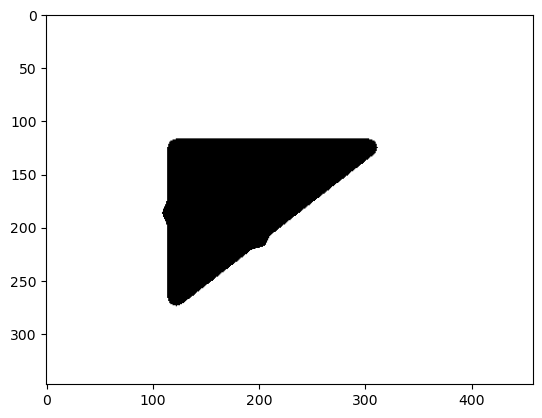

/Users/user/Skole/Semester-9/Visuell_databehandling/code/Visuell-IP/assignment 3/utils.py:39: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


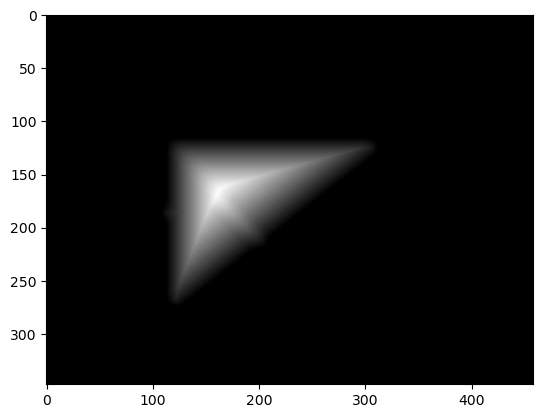

Saving image to: image_processed/noisy-distance.png


In [31]:
if __name__ == "__main__":
    im = utils.read_image("noisy-filtered.png", image_folder=pathlib.Path("image_processed")) # <-- This image is created in task3a
    binary_image = (im != 0)
    distance = distance_transform(binary_image)

    assert im.shape == distance.shape, "Expected image shape ({}) to be same as resulting image shape ({})".format(
            im.shape, distance.shape)
    assert distance.dtype == np.int32, "Expected resulting image dtype to be np.int32. Was: {}".format(
            distance.dtype)

    distance = utils.to_uint8(distance)
    plt.imshow(distance, cmap="gray")
    plt.show()
    utils.save_im("noisy-distance.png", distance)